Fundamentos de mineração de dados e ciência de dados

Desempenho e avaliação - 27/10



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


Considere o conjunto de dados sobre o molusco Abalone, que pode ser encontrado na página: https://archive.ics.uci.edu/dataset/1/abalone.

In [4]:
# Carregar o dataset Abalone
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
cols = ["sex", "length", "diameter", "height", "whole_weight",
        "shucked_weight", "viscera_weight", "shell_weight", "rings"]

df = pd.read_csv(url, header=None, names=cols)

# Visualizar as 5 primeiras linhas
df.head()


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- Escolha uma variável dependente, alvo de seu modelo de predição.

- Escolha as variáveis dependentes que queira usar em seu modelo.

- Formule o problema como regressão ou classificação, conforme sua preferência.

In [5]:
# Variável dependente (alvo)
# O número de "rings" representa o número de anéis do molusco.
# Problema é de REGRESSÃO.
target = "rings"

# Variáveis independentes escolhidas:
# Usaremos medidas físicas e peso, que influenciam a idade.
features = ["length", "diameter", "height", "whole_weight",
            "shucked_weight", "viscera_weight", "shell_weight"]

# Separar X e y
X = df[features].values
y = df[target].values


- Escolha então uma medida de desempenho adequada à sua variável dependente e ao seu problema. Justifique sua escolha.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [6]:
# Métrica escolhida: Erro Absoluto Médio (MAE)
# Justificativa:
# O MAE mede a diferença média entre as previsões e os valores reais.
# É uma métrica intuitiva para regressão e menos sensível a outliers do que o MSE.

mae_baseline = np.mean(np.abs(y - np.mean(y)))
print(f"MAE base (modelo que sempre prevê a média do conjunto): {mae_baseline:.4f}")


MAE base (modelo que sempre prevê a média do conjunto): 2.3625


- Separe o conjunto de dados em treino e teste. Cuidado com vazamentos, se for fazer pré-processamento! Faça o pré-processamento somente após a divisão.

In [7]:
# Separação em treino e teste (70% treino / 30% teste)
# random_state=42 garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho treino: {X_train.shape}, Tamanho teste: {X_test.shape}")


Tamanho treino: (2923, 7), Tamanho teste: (1254, 7)


- Treine seu modelo no conjunto de treino e teste-o no de teste (com os hiperparâmetros de sua escolha, fixos e arbitrários).

In [8]:
# Instanciar o modelo com hiperparâmetros fixos e arbitrários
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    random_state=42
)

# Treinar o modelo
model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE no teste: {mae:.4f}")
print(f"R² no teste: {r2:.4f}")


MAE no teste: 1.5344
R² no teste: 0.5348


- Construa a curva de aprendizagem de seu modelo nos subconjuntos de teste.

- Grafique a curva tanto nos subconjuntos de teste quanto de treino. Tudo parece normal, ou há algum fenômeno visto?

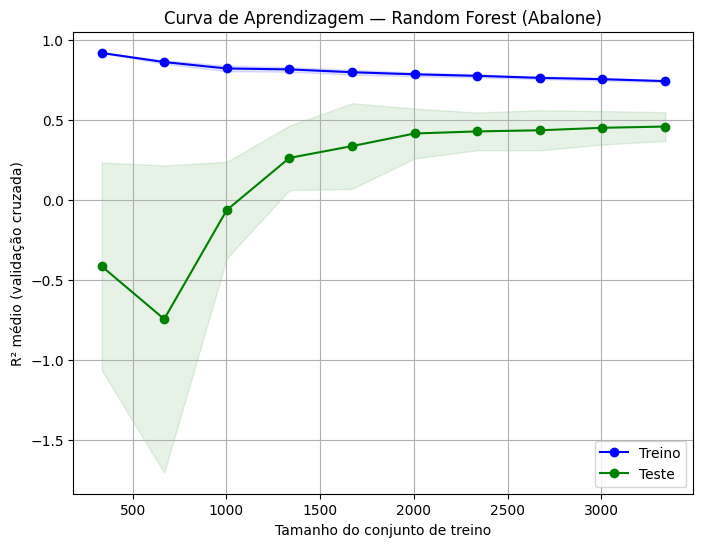

In [9]:
# Gerar curva de aprendizagem (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Calcular médias e desvios
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar curva de aprendizagem
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Treino')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Teste')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title("Curva de Aprendizagem — Random Forest (Abalone)")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("R² médio (validação cruzada)")
plt.legend()
plt.grid(True)
plt.show()


O gráfico não está totalmente normal, ele revela um leve sobreajuste (overfitting), comum em modelos de Random Forest quando há muitos parâmetros e poucos dados de teste em relação ao total.
Apesar disso, o modelo generaliza razoavelmente bem, pois o R² da curva de teste tende a se estabilizar positivamente, indicando aprendizado válido, ainda que com espaço para otimização.